<a href="https://colab.research.google.com/github/arshad831/panda-challenge/blob/main/Unicorn_companies_analysisworkshop-2ndAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Unicorn_Companies.csv')

# Display the first few rows of the dataframe
df.head()


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


**Dictionary**

Company: The name of the company.

Valuation ($B): The valuation of the company in billions of dollars.

Date Joined: The date when the company joined the unicorn club.

Country: The country where the company is based.

City: The city where the company is based.

Industry: The industry in which the company operates.

Select Investors: Key investors in the company.

Founded Year: The year the company was founded.

Total Raised: The total amount of funding the company has raised.

Financial Stage: The current financial stage of the company (e.g., IPO, Acquired).

Investors Count: The number of investors in the company.

Deal Terms: The number of deal terms the company has had.

Portfolio Exits: The number of portfolio exits the company has had.

Now, let's proceed to the **data cleaning** stage.


1. Clean the Valuation field with the $ sign and convert the value to numeric.


---


2. Clean the Total Raised field to remove the '$' sign and 'B' (for billion),Million and Thousands and convert the value to numeric.

3. Clean the Industry field to have consistent names.

4. Clean the Financial Stage field to have consistent names.
5. Missing values

In [ ]:
df.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64

In [ ]:
# Modify the clean_total_raised function to handle 'None' values and cases where the Total Raised field is already in dollars

def clean_total_raised(value):
    if pd.isnull(value) or value == 'None':
        return None
    if 'B' in value:
        return float(value.replace('$', '').replace('B', '')) * 1e9  # Convert to dollars
    elif 'M' in value:
        return float(value.replace('$', '').replace('M', '')) * 1e6  # Convert to dollars
    elif 'K' in value:
        return float(value.replace('$', '').replace('K', '')) * 1e3  # Convert to dollars
    else:
        return float(value.replace('$', ''))

df['Total Raised'] = df['Total Raised'].apply(clean_total_raised)

# Display the first few rows of the dataframe
df.head()


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8,5
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39,12,1
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25,5,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1037 non-null   object 
 7   Founded Year       1037 non-null   object 
 8   Total Raised       1013 non-null   float64
 9   Financial Stage    1037 non-null   object 
 10  Investors Count    1037 non-null   object 
 11  Deal Terms         1037 non-null   object 
 12  Portfolio Exits    1037 non-null   object 
dtypes: float64(1), object(12)
memory usage: 105.4+ KB


In [ ]:
df.head(100)

In [ ]:
df['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Inn

In [ ]:
# Clean the Financial Stage fields as before
df['Financial Stage'] = df['Financial Stage'].replace('Acq', 'Acquired')

In [ ]:
# Correct the typo in 'Finttech'
df['Industry'] = df['Industry'].replace('Finttech', 'Fintech')

In [ ]:
# Let's correct the typo in 'Finttech' and make sure that the Industry column only contains industry names, not investor names.

# List of known industries
known_industries = ['Artificial intelligence', 'Fintech',
                    'Internet software & services',
                    'Supply chain, logistics, & delivery',
                    'Data management & analytics',
                    'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
                    'Consumer & retail', 'Health', 'Auto & transportation',
                    'Cybersecurity', 'Mobile & telecommunications', 'Travel']

# If the industry is not in the known industries list, categorize it as 'Other'
df['Industry'] = df['Industry'].apply(lambda x: x if x in known_industries else 'Other')



# Check the unique values of the Industry field
industry_values_cleaned = df['Industry'].unique()

industry_values_cleaned


array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Hardware', 'Consumer & retail', 'Health',
       'Auto & transportation', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel'], dtype=object)

In [ ]:
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '')

# Convert the value to numeric
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'], errors='coerce')

<ipython-input-21-7cf59079a576>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   float64
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1037 non-null   object 
 7   Founded Year       1037 non-null   object 
 8   Total Raised       1013 non-null   float64
 9   Financial Stage    1037 non-null   object 
 10  Investors Count    1037 non-null   object 
 11  Deal Terms         1037 non-null   object 
 12  Portfolio Exits    1037 non-null   object 
dtypes: float64(2), object(11)
memory usage: 105.4+ KB


In [ ]:


# Descriptive Analysis

# Measures of central tendency and dispersion for numeric variables
numeric_descriptive = df[['Valuation ($B)', 'Total Raised']].describe()

# Frequency counts for categorical variables
categorical_descriptive = df[['Industry', 'Country', 'Financial Stage']].apply(lambda x: x.value_counts()).T.stack()

numeric_descriptive, categorical_descriptive


(       Valuation ($B)  Total Raised
 count     1037.000000  1.013000e+03
 mean         3.292083  5.757672e+08
 std          7.309781  7.360876e+08
 min          1.000000  1.000000e+04
 25%          1.080000  2.273400e+08
 50%          1.600000  3.777000e+08
 75%          3.100000  6.337800e+08
 max        140.000000  7.440000e+09,
 Industry         Artificial intelligence         71.0
                  Auto & transportation           29.0
                  Consumer & retail               25.0
                  Cybersecurity                   49.0
                  Data management & analytics     41.0
                                                 ...  
 Financial Stage  IPO                              7.0
                  Management                       1.0
                  None                           988.0
                  Reverse                          1.0
                  Take                             1.0
 Length: 70, dtype: float64)

<ipython-input-13-7cf59079a576>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '')


In [ ]:
df

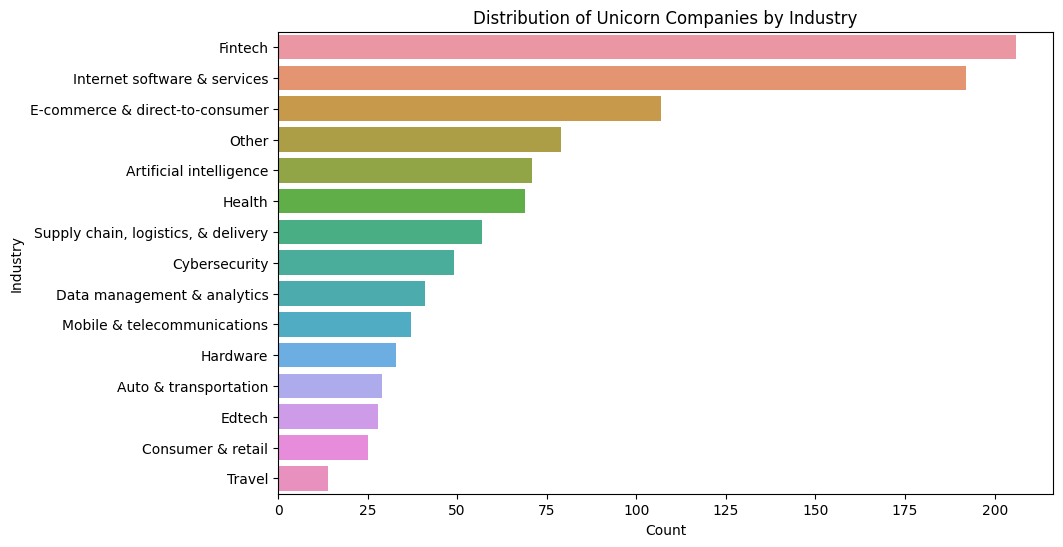

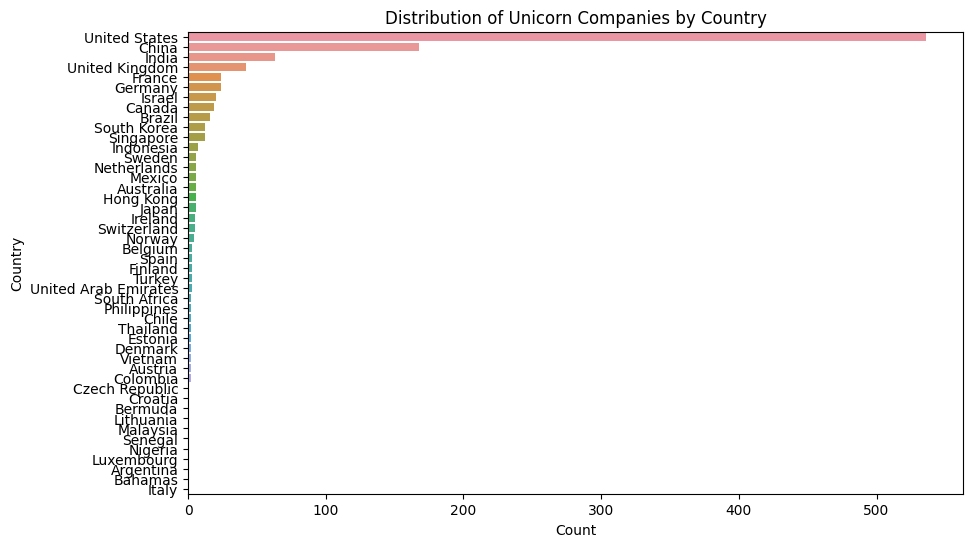

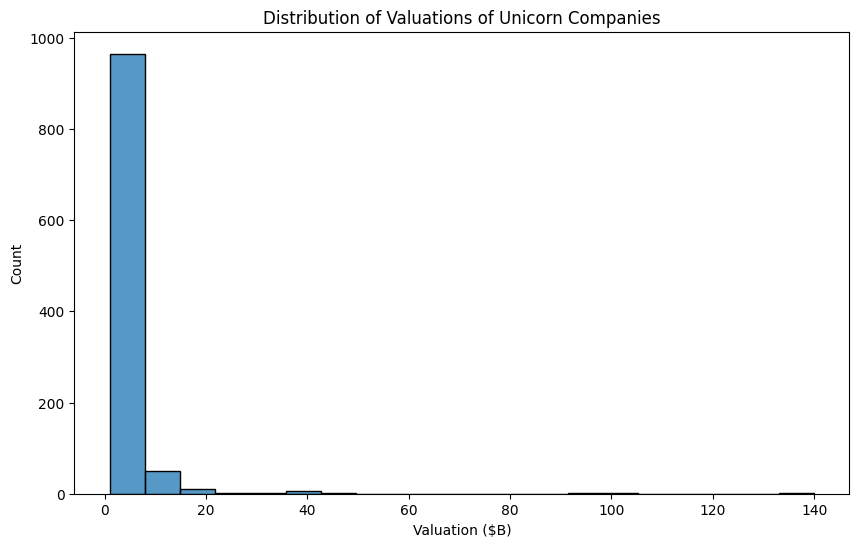

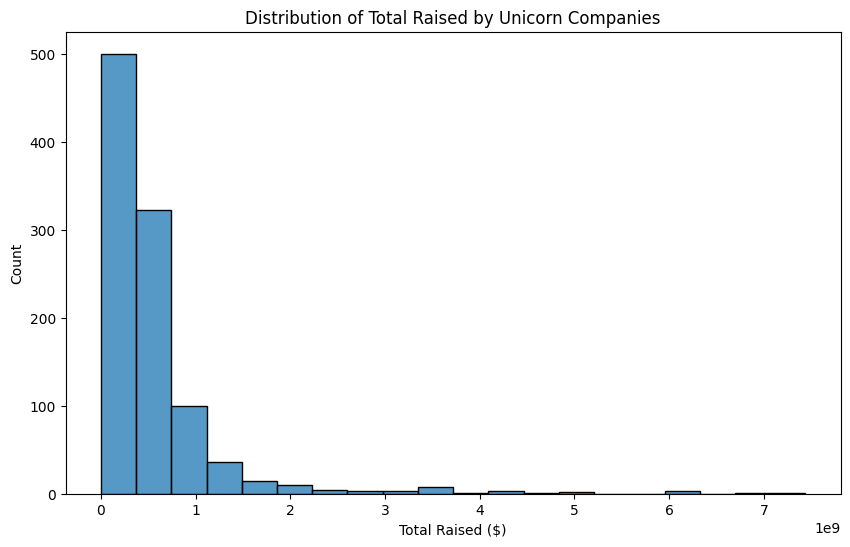

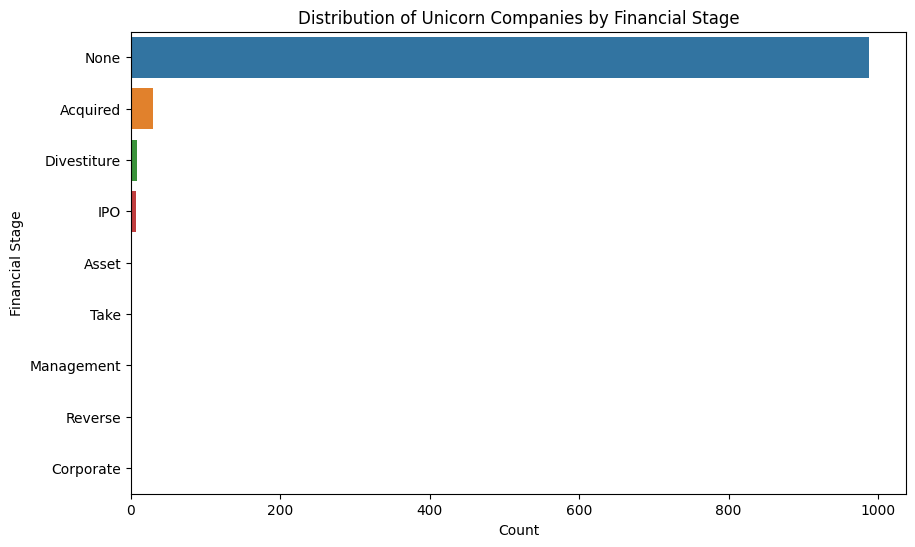

In [ ]:
# Rerun the visual analysis with the cleaned Industry field.
import matplotlib.pyplot as plt
import seaborn as sns

# Industry Analysis
plt.figure(figsize=(10,6))
sns.countplot(y="Industry", data=df, order = df['Industry'].value_counts().index)
plt.title("Distribution of Unicorn Companies by Industry")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

# Country Analysis
plt.figure(figsize=(10,6))
sns.countplot(y="Country", data=df, order = df['Country'].value_counts().index)
plt.title("Distribution of Unicorn Companies by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Valuation Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Valuation ($B)'], bins=20, kde=False)
plt.title("Distribution of Valuations of Unicorn Companies")
plt.xlabel("Valuation ($B)")
plt.ylabel("Count")
plt.show()

# Total Raised Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Total Raised'], bins=20, kde=False)
plt.title("Distribution of Total Raised by Unicorn Companies")
plt.xlabel("Total Raised ($)")
plt.ylabel("Count")
plt.show()

# Financial Stage Analysis
plt.figure(figsize=(10,6))
sns.countplot(y="Financial Stage", data=df, order = df['Financial Stage'].value_counts().index)
plt.title("Distribution of Unicorn Companies by Financial Stage")
plt.xlabel("Count")
plt.ylabel("Financial Stage")
plt.show()


In [ ]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8,5
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39,12,1
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,1.810600e+08,None,7,2,None
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,7.000000e+08,None,10,2,None
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,4.497200e+08,None,30,6,None
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,5.255000e+08,None,6,2,None


In [ ]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = df[['Valuation ($B)', 'Total Raised']].corr()

# Display the correlation matrix
correlation_matrix

,Valuation ($B),Total Raised
Valuation ($B),1.000000,0.616879
Total Raised,0.616879,1.000000


The **correlation matrix** shows the correlation between the numeric variables Valuation ($B) and Total Raised. The correlation coefficient is approximately 0.62, indicating a moderate to strong positive correlation. This suggests that companies that have raised more funds tend to have higher valuations, which is a reasonable expectation. However, correlation does not imply causation, and other factors could also influence these variables.

In [ ]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
from reportlab.platypus import SimpleDocTemplate, PageBreak, Paragraph, Image, Table
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch



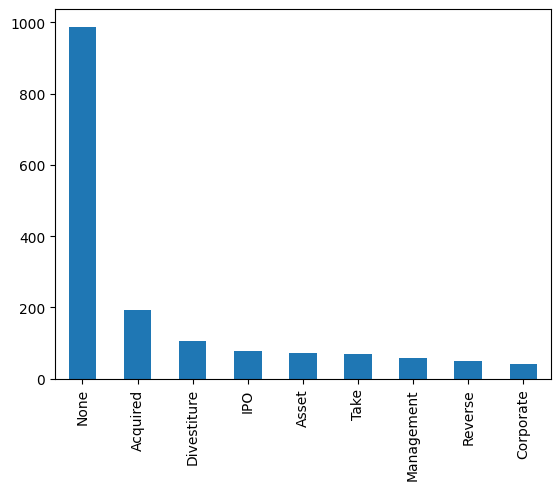

In [ ]:
# Generate the plots and save them as image files
df['Industry'].value_counts().plot(kind='bar')
plt.savefig('industry_counts.png')

df['Country'].value_counts().plot(kind='bar')
plt.savefig('country_counts.png')

df['Financial Stage'].value_counts().plot(kind='bar')
plt.savefig('financial_stage_counts.png')


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader
from reportlab.platypus import SimpleDocTemplate, PageBreak, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch

# Create a SimpleDocTemplate
doc = SimpleDocTemplate("unicorn_analysis_report-2ndaug.pdf", pagesize=letter)

# Create a list to hold the report elements
elements = []

# Add a title, company name, and logo to the report
elements.append(Paragraph("Company : Decoding Data Science", getSampleStyleSheet()['Heading1']))
logo = "logo-highres-removebg-preview.png"
im = Image(logo, 2*inch, 2*inch)
elements.append(im)

# Add the descriptive statistics to the report
elements.append(Paragraph("Descriptive Statistics:", getSampleStyleSheet()['Heading2']))
elements.append(Paragraph(str(numeric_descriptive)))
elements.append(Paragraph(str(categorical_descriptive)))

# Add the correlation matrix to the report
elements.append(PageBreak())
elements.append(Paragraph("Correlation Matrix:", getSampleStyleSheet()['Heading2']))
elements.append(Paragraph(str(correlation_matrix)))

# Add the data visualizations to the report
elements.append(PageBreak())
elements.append(Paragraph("Data Visualizations:", getSampleStyleSheet()['Heading2']))
im = Image('industry_counts.png', 5*inch, 3*inch)
elements.append(im)
im = Image('country_counts.png', 5*inch, 3*inch)
elements.append(im)
im = Image('financial_stage_counts.png', 5*inch, 3*inch)
elements.append(im)

# Build the PDF
doc.build(elements)


In [ ]:
# Create a SimpleDocTemplate
doc = SimpleDocTemplate("unicorn_analysis_report.pdf", pagesize=letter)

# Create a list to hold the report elements
elements = []

# Add a title, company name, and logo to the report
elements.append(Paragraph("Company Decoding Data Science", getSampleStyleSheet()['Heading1']))
logo = "logo-highres.jpg"
im = Image(logo, 2*inch, 2*inch)
elements.append(im)

# Add the descriptive statistics to the report
elements.append(PageBreak())
elements.append(Paragraph("Descriptive Statistics:", getSampleStyleSheet()['Heading2']))
elements.append(Table(numeric_descriptive.reset_index().values.tolist() + categorical_descriptive.reset_index().values.tolist()))

# Add the correlation matrix to the report
elements.append(PageBreak())
elements.append(Paragraph("Correlation Matrix:", getSampleStyleSheet()['Heading2']))
elements.append(Table(correlation_matrix.reset_index().values.tolist()))




# Add the data visualizations to the report
elements.append(PageBreak())
elements.append(Paragraph("Data Visualizations:", getSampleStyleSheet()['Heading2']))
im = Image('industry_counts.png', 5*inch, 3*inch)
elements.append(im)
im = Image('country_counts.png', 5*inch, 3*inch)
elements.append(im)
im = Image('financial_stage_counts.png', 5*inch, 3*inch)
elements.append(im)




# Build the PDF
doc.build(elements)
